#EDA

In [20]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import kagglehub
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


In [22]:
# Download latest version
path = kagglehub.dataset_download("stefanouccelli/tesis-1")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\el_me\.cache\kagglehub\datasets\stefanouccelli\tesis-1\versions\1


In [23]:
# List files in the downloaded directory
files_in_path = os.listdir(path)
print("Files in the downloaded directory:", files_in_path)

Files in the downloaded directory: ['PS_20174392719_1491204439457_log (1).csv.crdownload']


In [24]:
# Construct the full path to the downloaded file
old_file_path = os.path.join(path, files_in_path[0])

# Construct the new file path in a writable directory
new_file_path_in_writable = os.path.join( files_in_path[0])

# Copy the file to the writable directory
shutil.copyfile(old_file_path, new_file_path_in_writable)

print(f"Copied '{old_file_path}' to '{new_file_path_in_writable}'")

# Construct the final file path after removing '.crdownload'
final_file_path = new_file_path_in_writable.replace('.crdownload', '')

# Rename the copied file
os.rename(new_file_path_in_writable, final_file_path)

print(f"Renamed '{new_file_path_in_writable}' to '{final_file_path}'")

# Load the renamed file into a pandas DataFrame
df = pd.read_csv(final_file_path)

# Display the first few rows of the DataFrame
display(df.head())

Copied 'C:\Users\el_me\.cache\kagglehub\datasets\stefanouccelli\tesis-1\versions\1\PS_20174392719_1491204439457_log (1).csv.crdownload' to 'PS_20174392719_1491204439457_log (1).csv.crdownload'
Renamed 'PS_20174392719_1491204439457_log (1).csv.crdownload' to 'PS_20174392719_1491204439457_log (1).csv'


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706070 entries, 0 to 3706069
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 311.0+ MB


In [26]:
df.sample(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1929165,168,PAYMENT,8177.62,C1338686205,28252.48,20074.86,M1989030738,0.0,0.00,0.0,0.0
527633,20,PAYMENT,4822.95,C282481871,22298.00,17475.05,M1577614091,0.0,0.00,0.0,0.0
95109,10,CASH_OUT,15844.96,C1265342540,224.00,0.00,C252826880,0.0,188677.91,0.0,0.0


 El archivo contiene un total de 3.706.070 registros y un total de  11 columnas
* step: Indica probablemente el momento (horas o secuencia) de la transacción.
* type: Tipo de transacción (CASH_OUT, PAYMENT, etc.).
* amount: Monto de la transacción.
* nameOrig, nameDest: Identificadores de origen y destino (anónimos).
* oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest: Saldos antes y después en origen y destino.
* isFraud: Indicador si la transacción es fraude.
* isFlaggedFraud: Indicador de alerta (¿posible fraude detectado automáticamente?).


In [27]:
# Comprobar valores faltantes en cada columna
missing_summary = df.isnull().sum()
missing_summary_df = pd.DataFrame({"Columna": missing_summary.index, "Valores Faltantes": missing_summary.values})
missing_summary_df

,Columna,Valores Faltantes
0,step,0
1,type,0
2,amount,0
3,nameOrig,1
4,oldbalanceOrg,1
5,newbalanceOrig,1
6,nameDest,1
7,oldbalanceDest,1
8,newbalanceDest,1
9,isFraud,1


imputacion de valores faltantes

In [28]:
#Eliminar las filas na
df = df[df['nameOrig'].notna()]

In [29]:
#Valores duplicados

duplicated_rows = df[df.duplicated(keep=False)]
num_duplicated_rows = duplicated_rows.shape[0]

num_duplicated_rows, duplicated_rows.head()

(0,
 Empty DataFrame
 Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
 Index: [])

* No se encontraron valores duplicados y se elimino una fila que contenia valores nulos.
* Podemos proceder a realizar el analisis de los datos.

1.1 Analisis Univariado

In [30]:
#Analisis Univariado

numericas = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
categoricas = ['type', 'nameOrig', 'nameDest']

In [31]:
df[numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
step,3706069.0,1.486751e+02,8.533515e+01,1.0,43.00,164.00,214.00,2.770000e+02
amount,3706069.0,1.559767e+05,2.919418e+05,0.0,12372.07,75103.57,208704.87,9.244552e+07
oldbalanceOrg,3706069.0,8.384820e+05,2.904529e+06,0.0,0.00,14552.00,111135.00,3.893942e+07
newbalanceOrig,3706069.0,8.599043e+05,2.940909e+06,0.0,0.00,0.00,149998.22,3.894623e+07
oldbalanceDest,3706069.0,9.929963e+05,2.304300e+06,0.0,0.00,136255.05,938947.59,9.701472e+07
newbalanceDest,3706069.0,1.095616e+06,2.390822e+06,0.0,0.00,220574.62,1114937.86,1.500147e+08
isFraud,3706069.0,8.480684e-04,2.910927e-02,0.0,0.00,0.00,0.00,1.000000e+00
isFlaggedFraud,3706069.0,5.396554e-07,7.346123e-04,0.0,0.00,0.00,0.00,1.000000e+00


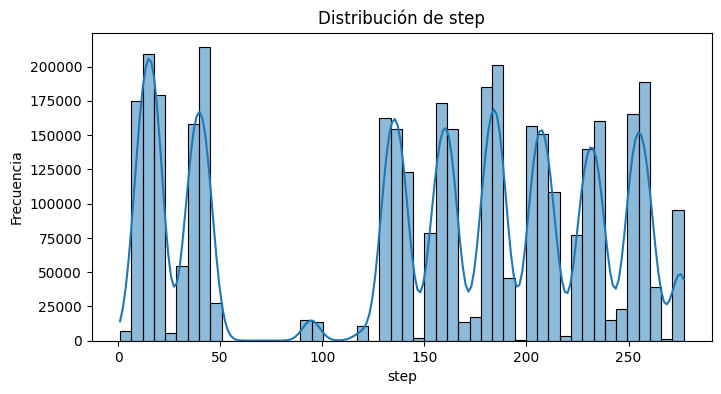

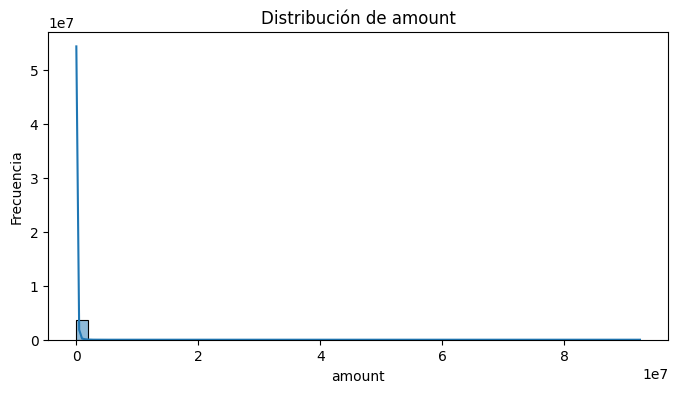

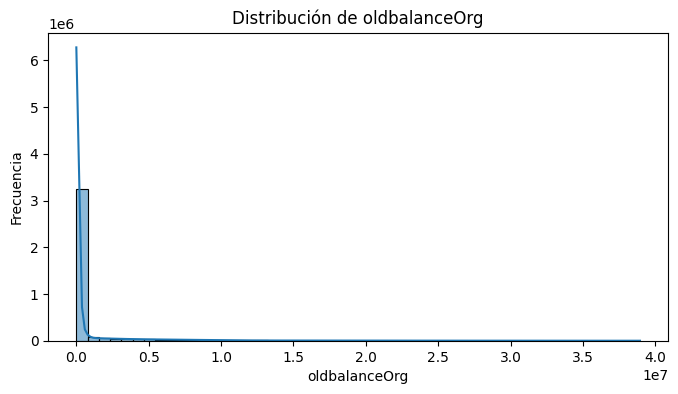

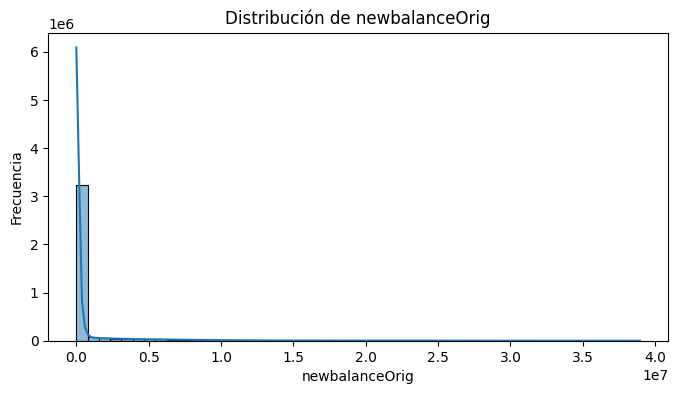

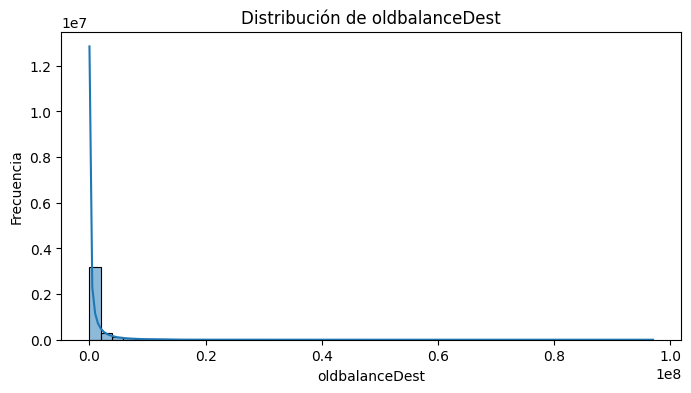

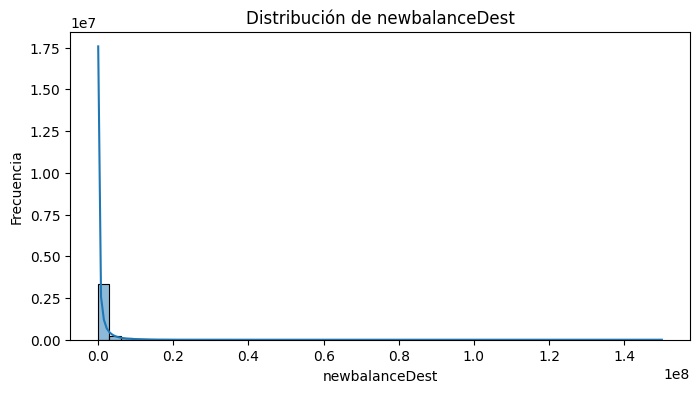

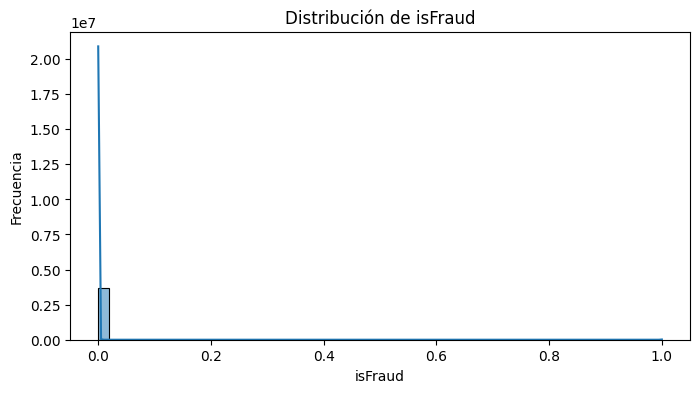

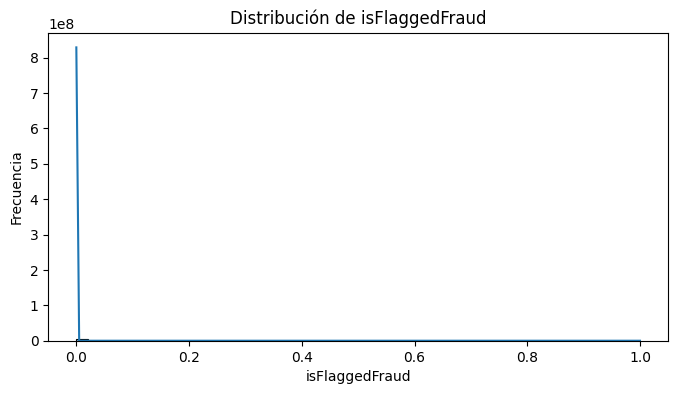

In [32]:
# Histograma para cada variable numérica 
for col in numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


In [33]:
display(df[df['amount']==0]['type'].count())
display(df[df['amount']>0]['type'].count())

np.int64(2)

np.int64(3706067)

In [34]:
df['type'].value_counts(normalize=True)

type
CASH_OUT    0.355214
PAYMENT     0.336906
CASH_IN     0.219051
TRANSFER    0.082653
DEBIT       0.006176
Name: proportion, dtype: float64

* Tenemos una distribución muy sesgada a la derecha con muchos valores bajos y muy pocos valores altos de todos los valores numericos sin contar los datos binarios.
* Tenemos outlier relacionados a los valores de las transacciones.
* En tipo de transacciones tenemos CASH_OUT con un 35%, PAYMENT con 33%, CASH-IN con 21%, TRANSFER 8% y DEBIT con 0.6%

In [35]:
#Desbalanceo de las muestras'isFraud' y 'isFlaggedFraud'
df['isFraud'].value_counts(normalize=True)

isFraud
0.0    0.999152
1.0    0.000848
Name: proportion, dtype: float64

* Podemos ver que el 99% de las transacciones no son fraudulentas y menos de un 0.1% son fraudulentas. por lo que tenemos un fuerte desbalanceo de las muestras.
* El desbalanceo de las muestras nos indican que hay una necedidad de oversamplig o undessamplig
* Las mejores meticas para la evaluación del modelo  son (F1, Recall y  Presición).
* La ingenieria de caracteristicas sera muy necesaria para poder identificar las transacciones fraudulentas.

Revisión de la asimetria y curtosis de los datos

In [36]:
# Calcular asimetría (skewness) y curtosis
skewness = df[numericas].apply(skew)
kurt = df[numericas].apply(kurtosis)

# Mostrar los resultados
results = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})
results.round(3)

,Skewness,Kurtosis
step,-0.411,-1.195
amount,31.513,5304.239
oldbalanceOrg,5.234,32.531
newbalanceOrig,5.166,31.730
oldbalanceDest,5.428,46.104
newbalanceDest,5.408,54.999
isFraud,34.295,1174.151
isFlaggedFraud,1361.261,1853029.500


* La asimetria nos indica que hay muchos valores sesgados asia la derecha muchos valores bajos y otros extremadamente altos.
* La curtosisi nos indica valores outliers muy altos en especial para amount, fraude esta muy alto como lo hemos visto anteriormente por el desbalanceo de las muestras.
* Las transformaciones de los datos pueden ser un buen punto de partida, transformaciones logaritmicas, raiz cuadrada, yeo-jhonson u otras pueden ser importantes

In [37]:
numericas

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

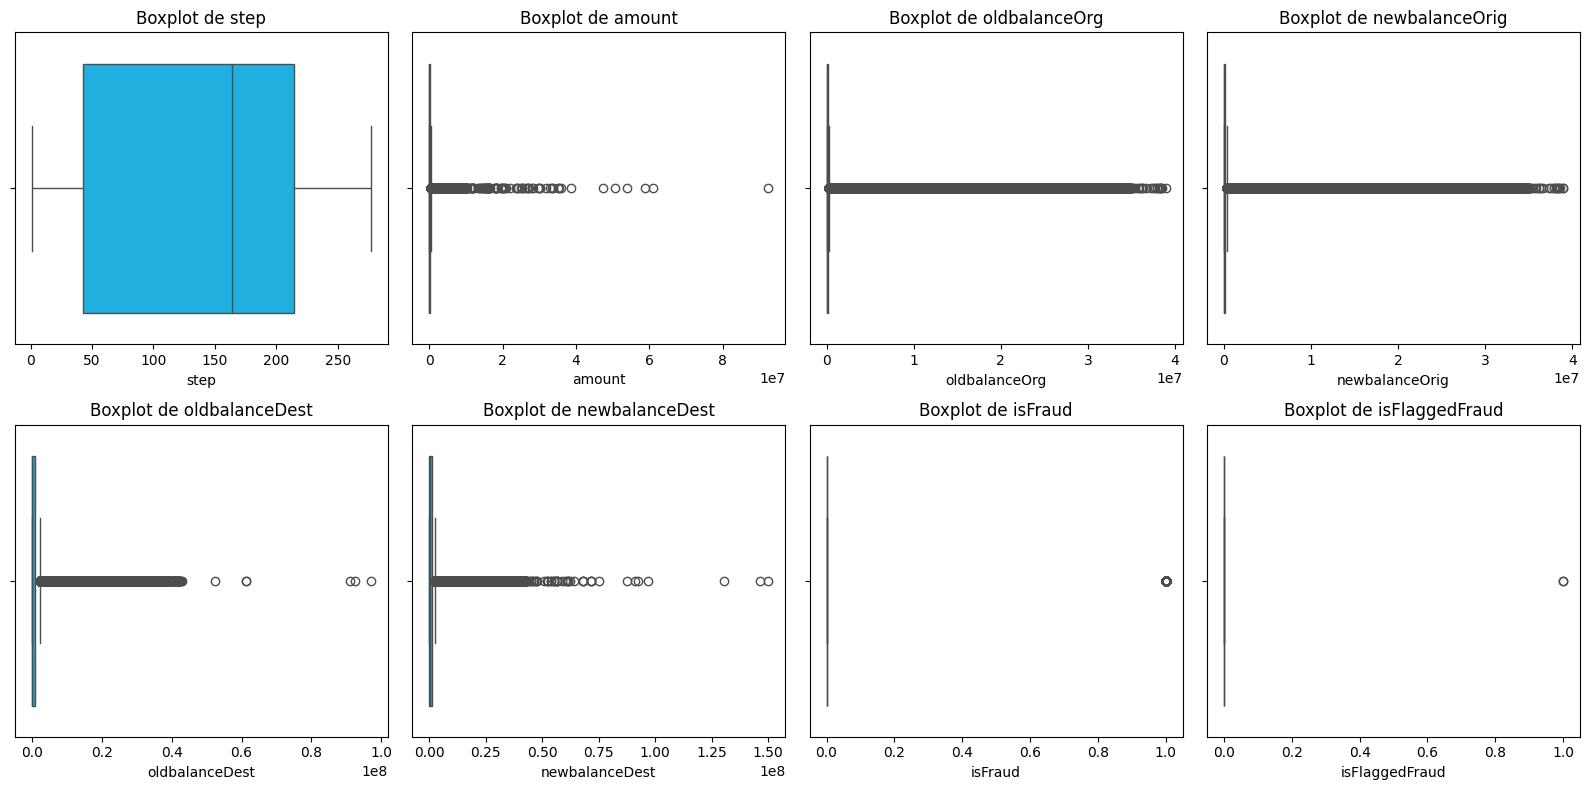

In [38]:
# Graficos de caja
plt.figure(figsize=(16, 8))
for i, col in enumerate(numericas, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col], color='deepskyblue')
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
plt.show()

2. Analisis Bivariado

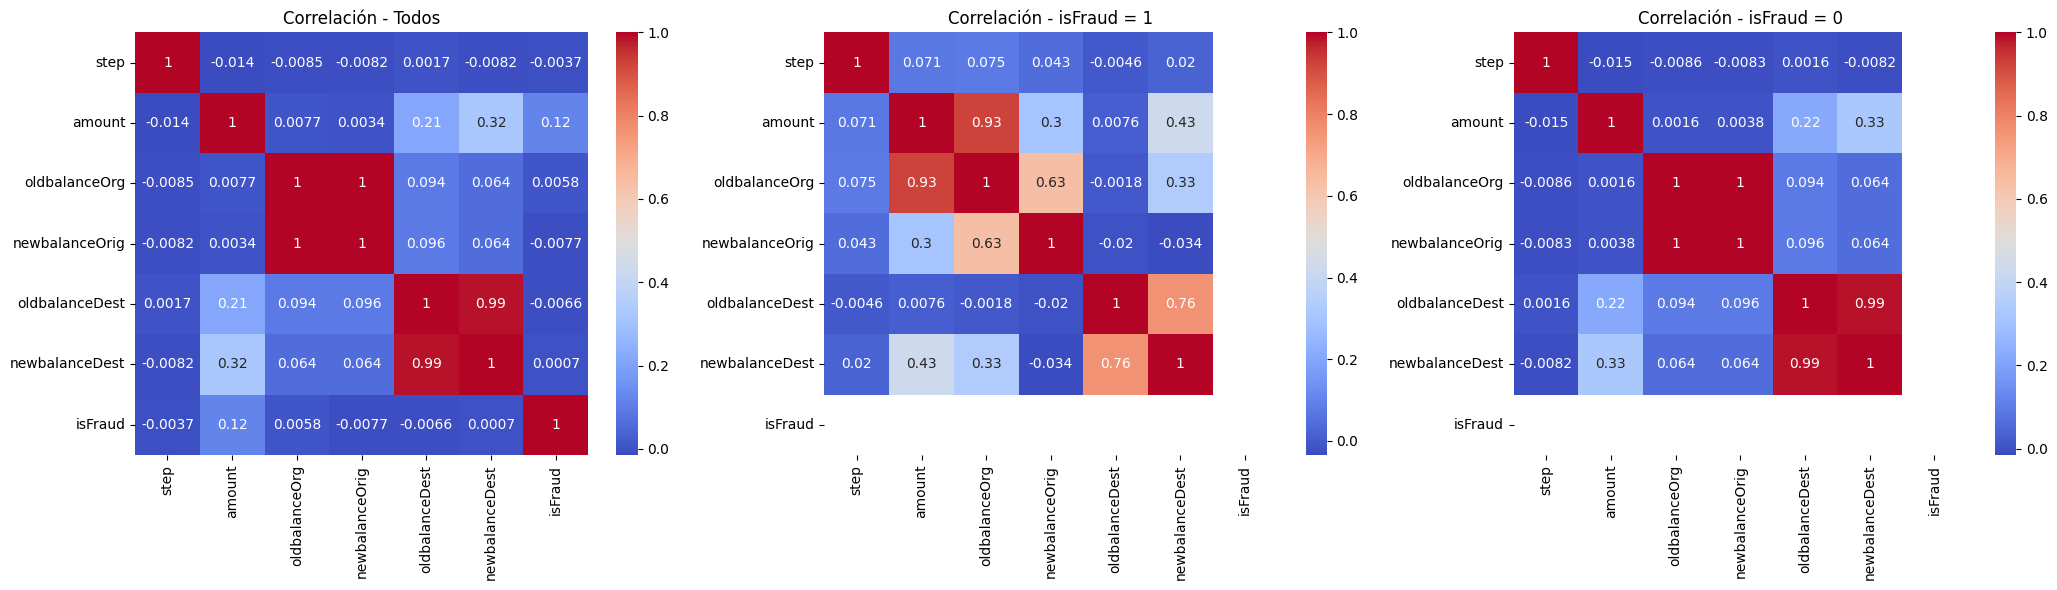

In [39]:
# Definir variables numéricas relevantes
numeric_vars = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
'oldbalanceDest', 'newbalanceDest', 'isFraud']

# 1. Heatmap para todo el dataset
corr_all = df[numeric_vars].corr()

# 2. Heatmap para isFraud == 1
corr_fraud = df[df['isFraud'] == 1][numeric_vars].corr()

# 3. Heatmap para isFraud == 0
corr_nofraud = df[df['isFraud'] == 0][numeric_vars].corr()

# Crear heatmaps
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

sns.heatmap(corr_all, annot=True, cmap="coolwarm", ax=axs[0])
axs[0].set_title('Correlación - Todos')

sns.heatmap(corr_fraud, annot=True, cmap="coolwarm", ax=axs[1])
axs[1].set_title('Correlación - isFraud = 1')

sns.heatmap(corr_nofraud, annot=True, cmap="coolwarm", ax=axs[2])
axs[2].set_title('Correlación - isFraud = 0')

plt.tight_layout()
plt.show()
######

In [40]:
#Correlaciones
print("Corrleacionesfraude")
display(corr_fraud)
display(corr_nofraud)

Corrleacionesfraude


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.071086,0.075252,0.043067,-0.004601,0.020477,NaN
amount,0.071086,1.000000,0.926179,0.297732,0.007625,0.425359,NaN
oldbalanceOrg,0.075252,0.926179,1.000000,0.633808,-0.001758,0.330699,NaN
newbalanceOrig,0.043067,0.297732,0.633808,1.000000,-0.020271,-0.034021,NaN
oldbalanceDest,-0.004601,0.007625,-0.001758,-0.020271,1.000000,0.760093,NaN
newbalanceDest,0.020477,0.425359,0.330699,-0.034021,0.760093,1.000000,NaN
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.014822,-0.008581,-0.008271,0.001640,-0.008235,NaN
amount,-0.014822,1.000000,0.001621,0.003754,0.222720,0.327748,NaN
oldbalanceOrg,-0.008581,0.001621,1.000000,0.999419,0.093905,0.064091,NaN
newbalanceOrig,-0.008271,0.003754,0.999419,1.000000,0.095802,0.064294,NaN
oldbalanceDest,0.001640,0.222720,0.093905,0.095802,1.000000,0.986424,NaN
newbalanceDest,-0.008235,0.327748,0.064091,0.064294,0.986424,1.000000,NaN
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN


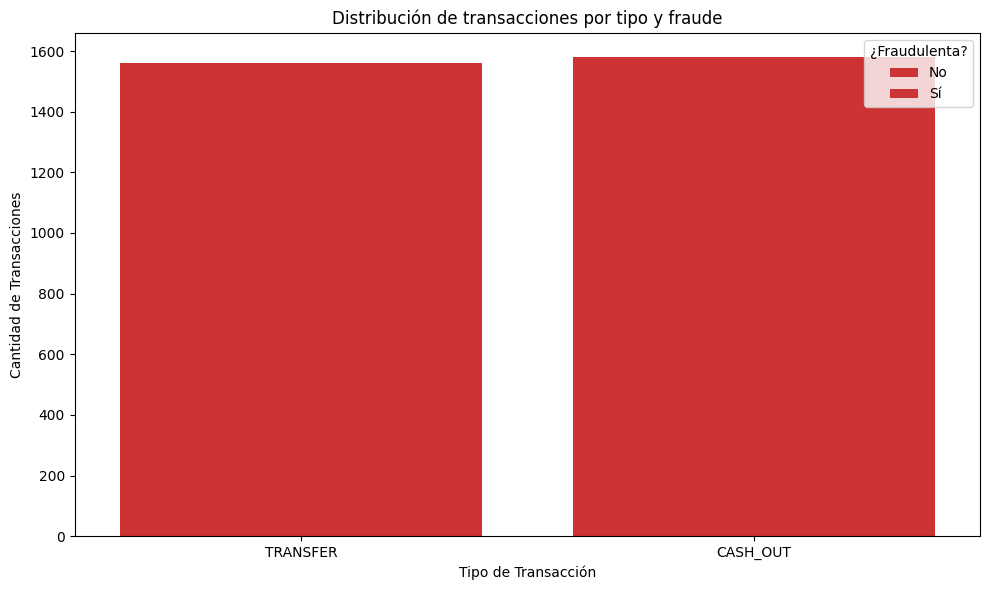

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot de conteo diferenciado por fraude/no fraude
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['isFraud']==1], x='type', hue='isFraud', palette='Set1')
plt.title("Distribución de transacciones por tipo y fraude")
plt.xlabel("Tipo de Transacción")
plt.ylabel("Cantidad de Transacciones")
plt.legend(title="¿Fraudulenta?", labels=["No", "Sí"])
plt.tight_layout()
plt.show()

In [42]:
# Filtrar solo las transacciones fraudulentas
fraud_df = df[df['isFraud'] == 1]

# Calcular el porcentaje de cada 'type' dentro de las transacciones fraudulentas
fraud_type_counts = fraud_df['type'].value_counts(normalize=True) * 100

# Mostrar el resultado en formato porcentaje
fraud_type_counts.round(2)

type
CASH_OUT    50.3
TRANSFER    49.7
Name: proportion, dtype: float64

C:\Users\el_me\AppData\Local\Temp\ipykernel_13380\2221402121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y='log_amount', data=df, palette='Set2')


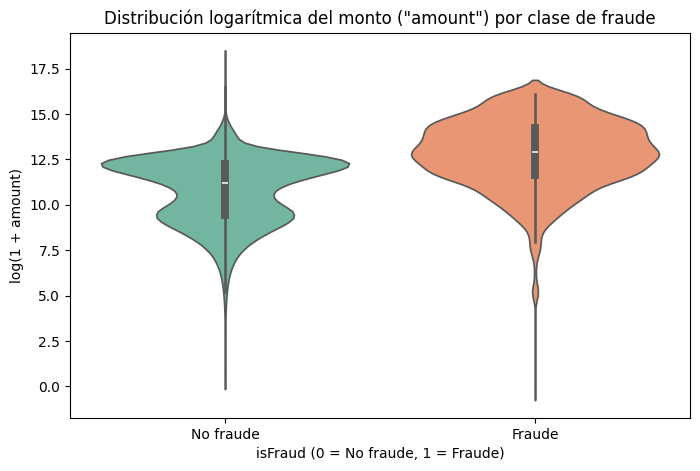

In [43]:
# Aplicar transformación logarítmica al monto (sumar 1 para evitar log(0))
df['log_amount'] = np.log1p(df['amount'])

# Crear el violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x='isFraud', y='log_amount', data=df, palette='Set2')

plt.title('Distribución logarítmica del monto ("amount") por clase de fraude')
plt.xlabel('isFraud (0 = No fraude, 1 = Fraude)')
plt.ylabel('log(1 + amount)')
plt.xticks([0,1], ['No fraude', 'Fraude'])
plt.show()

#### INGENIERIA DE DATOS MODELO ANALITICO PARA PREDECIR EL FRAUDE

In [281]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'log_amount', 'type_percentage', 'SQRT_ammount',
       'newbalanceDestSqrt', 'vacied_account', 'balance_Change',
       'balance_Change_Range'],
      dtype='object')

* Empezaremos por hacer una suposición del modelo,  queremos predecir la probabilidad que sea fraude una transacción, ya que de esta manera tendremos màs rango de maniobra en el modelo.

* las unicos tipos de variables con fraude son CASH_OUT (50.3%) Y TRANSFER (0.49%), utilizaremos estas variables en nuestro modelo.

In [56]:
percentage = df[df['isFraud']==1]['type'].value_counts(normalize=True)
display(percentage)

type
CASH_OUT    0.503023
TRANSFER    0.496977
Name: proportion, dtype: float64

In [253]:
#Almacenamos en un diccionario y realizamos un mpa con una nueva variable para modelar este porcentaje. 
percentage['CASH_OUT']
percentage['TRANSFER']

dicc_percentage = { 
    'CASH_OUT': percentage['CASH_OUT'],
    'TRANSFER': percentage['TRANSFER'],
    'PAYMENT': 0,
    'DEBIT': 0,
    'CASH_IN': 0
}

df['type_percentage'] = df['type'].map(dicc_percentage)
df[['type', 'type_percentage']].sample(5)

,type,type_percentage
1559855,PAYMENT,0.000000
1742829,TRANSFER,0.496977
3254528,PAYMENT,0.000000
2726416,CASH_OUT,0.503023
3141103,CASH_OUT,0.503023


In [64]:
df['SQRT_ammount'] = np.sqrt(df.amount)

print('Ammount Normal')
display(df.pivot_table(index='type', columns='isFraud', values='amount', aggfunc='mean', fill_value=0))
print('Ammount Log')
display(df.pivot_table(index='type', columns='isFraud', values='log_amount', aggfunc='mean', fill_value=0))
print('Ammount Sqrt')
display(df.pivot_table(index='type', columns='isFraud', values='SQRT_ammount', aggfunc='mean', fill_value=0))

Ammount Normal


isFraud,0.0,1.0
type,,
CASH_IN,167922.744554,0.000000e+00
CASH_OUT,176135.347930,1.333947e+06
DEBIT,5621.981321,0.000000e+00
PAYMENT,11723.327646,0.000000e+00
TRANSFER,627233.053540,1.354349e+06


Ammount Log


isFraud,0.0,1.0
type,,
CASH_IN,11.639294,0.000000
CASH_OUT,11.689133,12.804105
DEBIT,7.926548,0.000000
PAYMENT,8.875475,0.000000
TRANSFER,12.831301,12.838194


Ammount Sqrt


isFraud,0.0,1.0
type,,
CASH_IN,378.200192,0.000000
CASH_OUT,387.376365,883.283541
DEBIT,62.367887,0.000000
PAYMENT,97.441409,0.000000
TRANSFER,707.878268,892.652761


C:\Users\el_me\AppData\Local\Temp\ipykernel_13380\871266582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y='SQRT_ammount', data=df, palette='Set2')


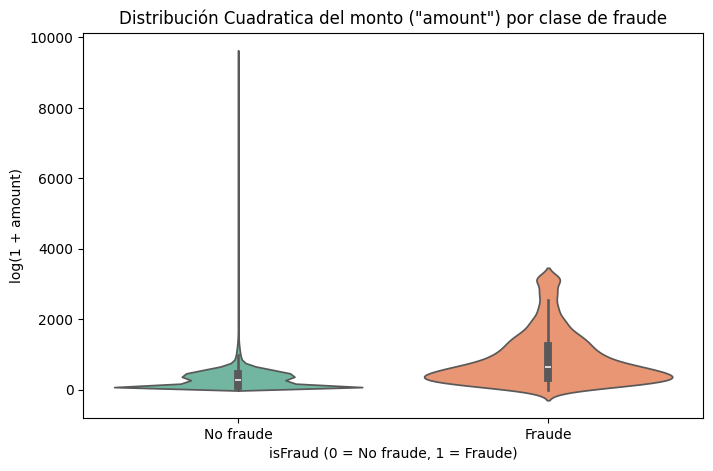

In [257]:
# Aplicar transformación logarítmica al monto (sumar 1 para evitar log(0))

# Crear el violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x='isFraud', y='SQRT_ammount', data=df, palette='Set2')

plt.title('Distribución Cuadratica del monto ("amount") por clase de fraude')
plt.xlabel('isFraud (0 = No fraude, 1 = Fraude)')
plt.ylabel('log(1 + amount)')
plt.xticks([0,1], ['No fraude', 'Fraude'])
plt.show()

Podemos identificar que el modelo con  SQRT es el que muestra mayor diferencia entre fraude y no fraude
1/0
CASH_OUT	387.376365	883.283541
TRANSFER	707.878268	892.652761

In [86]:
# Identificación por rangos

origin_destinity = df[df['isFraud']==1].groupby(['type','nameOrig', 'nameDest']).agg({
    'isFraud':'count', 
    'newbalanceDest':'mean',
    }
) 

origin_destinity = origin_destinity.reset_index()
origin_destinity.sample(5)

origin_destinity[origin_destinity['type']=='TRANSFER']['newbalanceDest'].value_counts()

newbalanceDest
0.00          1533
970749.68        1
101717.84        1
149522.78        1
665743.67        1
81209.81         1
141302.12        1
1656656.77       1
372227.52        1
95709.62         1
1184633.07       1
122454.16        1
3217683.65       1
276871.71        1
1658746.09       1
99994.39         1
96795.60         1
2325315.19       1
267095.19        1
226013.18        1
162310.05        1
263908.84        1
263492.28        1
261290.69        1
685216.50        1
746575.95        1
10872.90         1
97980.88         1
39888.47         1
69861.26         1
Name: count, dtype: int64

Los tipos de cuenta que transacciones TRANSFER que se vacian luego de latransacción tienen una probabilidad muy alta de ser una transacción fraudulenta

In [ ]:

df['newbalanceDestSqrt'] = np.sqrt(df['newbalanceDest'])
df.pivot_table(index=['type'], columns='isFraud', values='newbalanceDestSqrt', aggfunc='mean', fill_value=0).reset_index()

isFraud,type,0.0,1.0
0,CASH_IN,828.169850,0.000000
1,CASH_OUT,1035.439287,1228.990604
2,DEBIT,894.821184,0.000000
3,PAYMENT,0.000000,0.000000
4,TRANSFER,1423.173441,11.574393


crearemos una variable que nos indique si la cuenta fue vaciada

In [ ]:
df['vacied_account'] = np.where( ( (df['type']=='TRANSFER') & (df['newbalanceDest']==0) ), 1, 0)

,type,newbalanceDest,vacied_account
2571461,CASH_IN,180202.66,0
2440919,TRANSFER,205904.69,0
2941028,PAYMENT,0.00,0
2806612,PAYMENT,0.00,0
3629673,CASH_OUT,2473916.10,0
1766941,CASH_OUT,842179.95,0
2037445,CASH_IN,2693499.50,0
3300819,CASH_IN,673381.40,0
1933549,CASH_OUT,188257.96,0
692767,CASH_OUT,585170.46,0


In [94]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount,type_percentage,SQRT_ammount,newbalanceDestSqrt,vacied_account
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9.194276,0.000000,99.194960,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,7.531166,0.000000,43.177309,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,5.204007,0.496977,13.453624,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,5.204007,0.503023,13.453624,0.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,9.364703,0.000000,108.019165,0.0,0


Creamos una variable como diferencia porcentual entre el balance anterior y el nuevo balance


In [ ]:
df['balance_Change'] = (df['newbalanceDest'] - df['oldbalanceDest'])/(df['oldbalanceDest'])

In [295]:
epsilon = 1e-10
df['balance_Change_Origin'] = (df['newbalanceOrig'] - df['oldbalanceOrg'])/(df['oldbalanceOrg']+epsilon)
df['balance_Change_Origin'] = np.abs(df['balance_Change_Origin'])
df['balance_Change_Origin'] .sample(5)

2957443    0.000000
3565828    0.247462
2816714    0.401194
882563     1.000000
2766244    0.000000
Name: balance_Change_Origin, dtype: float64

In [152]:
# Asegura que balance_Change esté entre 0 y 100
df['balance_Change'] = df['balance_Change'].clip(0, 100)

bins = [0.0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]

df['balance_Change_Range'] = pd.cut(df['balance_Change'], bins=bins, labels=labels, include_lowest=True, right=False)

print(df['balance_Change_Range'].isnull().sum())

0


In [296]:
# Asegura que balance_Change esté entre 0 y 100

df['balance_Change_Origin'] = df['balance_Change_Origin'].clip(0, 100)

bins = [0.0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]

df['balance_Change_Origin_Range'] = pd.cut(df['balance_Change_Origin'], bins=bins, labels=labels, include_lowest=True, right=False)

print(df['balance_Change_Origin_Range'].isnull().sum())

0


In [301]:
df['balance_Change_Origin_Range'].sample(5)

3461113    9
424917     1
357116     1
117215     9
2689833    1
Name: balance_Change_Origin_Range, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

Podemos ver que el cambio de 

In [302]:
df.groupby('balance_Change_Origin_Range').aggregate({'isFraud':'value_counts'})

C:\Users\el_me\AppData\Local\Temp\ipykernel_13380\482376114.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('balance_Change_Origin_Range').aggregate({'isFraud':'value_counts'})


isFraud
balance_Change_Origin_Range isFraud         
1                           0.0      2123929
                            1.0           30
2                           0.0       107247
                            1.0            2
3                           0.0        76841
                            1.0            3
4                           0.0        60432
                            1.0            3
5                           0.0        49900
                            1.0            6
6                           0.0        42388
                            1.0            5
7                           0.0        36625
                            1.0            6
8                           0.0        32544
                            1.0            5
9                           0.0      1173020
                            1.0         3083

Los cambios porcentuales más grandes son en donde se presentan mayormente los fraudes, por lo que la variable balance_Change_Range mostrara un buen resultado en la predicción. 

Modelo de Clasificación

In [313]:
df.head()
df['balance_Change_Origin_Range'] = df['balance_Change_Origin_Range'].astype('int')
df['balance_Change_Range'] = df['balance_Change_Range'].astype('int')

In [335]:
df.groupby('type').aggregate({'isFraud':'value_counts'})

isFraud
type     isFraud         
CASH_IN  0.0       811817
CASH_OUT 0.0      1314867
         1.0         1581
DEBIT    0.0        22890
PAYMENT  0.0      1248597
TRANSFER 0.0       304755
         1.0         1562

In [367]:
df.groupby('type').aggregate({'isFraud':'value_counts'})
df1 = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])].copy()

In [368]:
#Seleccionar las caracteristicas para proyectar el modelo y la variable objetivo

x = df1[['type_percentage', 'log_amount', 'vacied_account', 'balance_Change_Range', 'newbalanceDestSqrt','balance_Change_Origin_Range']]
y = df1['isFraud']

In [369]:
#Crear la variable dummy para la variable categórica 'type'
#x = pd.get_dummies(x, columns=['type'], drop_first=True)
x.head()

,type_percentage,log_amount,vacied_account,balance_Change_Range,newbalanceDestSqrt,balance_Change_Origin_Range
2,0.496977,5.204007,1,9,0.000000,9
3,0.503023,5.204007,0,9,0.000000,9
15,0.503023,12.342066,0,9,226.965724,9
19,0.496977,12.279840,1,9,0.000000,9
24,0.496977,12.649754,0,9,1648.991477,9


In [370]:
x.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1622765 entries, 2 to 3706066
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   type_percentage              1622765 non-null  float64
 1   log_amount                   1622765 non-null  float64
 2   vacied_account               1622765 non-null  int64  
 3   balance_Change_Range         1622765 non-null  int64  
 4   newbalanceDestSqrt           1622765 non-null  float64
 5   balance_Change_Origin_Range  1622765 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 86.7 MB


In [340]:
#Dividir el conjunto en entrenamiento y prueba

x['balance_Change_Range'].unique()
x['balance_Change_Range'] = x['balance_Change_Range'].astype(int)

####
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123, stratify=y)

C:\Users\el_me\AppData\Local\Temp\ipykernel_13380\4049173046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['balance_Change_Range'] = x['balance_Change_Range'].astype(int)


In [371]:
#Generar un de regresion logistica
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, f1_score, recall_score

print(f'recall_score: {recall_score(y_test, y_pred)}')
print("f1-Score:", f1_score(y_test, y_pred))

#

recall_score: 0.4634146341463415
f1-Score: 0.5606157793457345


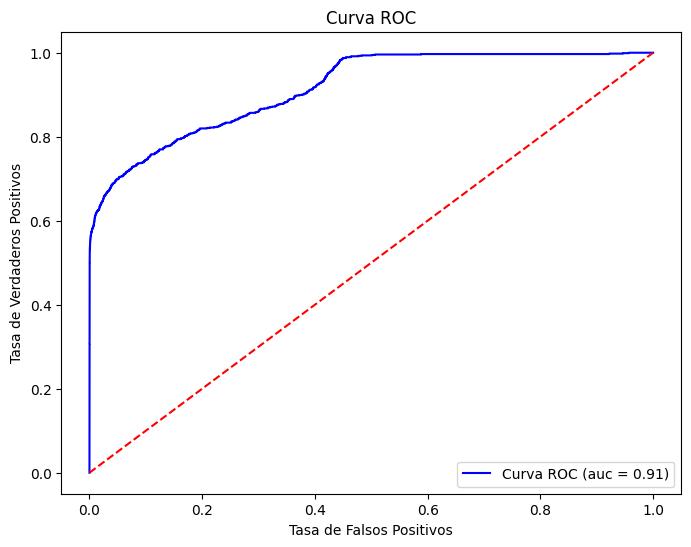

In [372]:
#Graficar la curva ROC
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (auc = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()

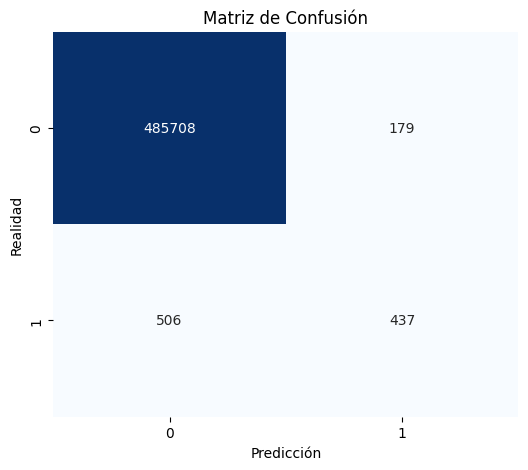

In [373]:
#Graficar la matriz de confusion

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [321]:
pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [404]:
#utilizar Xgboost para mejorar el modelo
from xgboost import XGBClassifier


xgb_model = XGBClassifier(use_label_encoder=False,
                           eval_metric='pre',
                            random_state=123,
                            n_jobs=-1,
                            max_depth=5,
                            max_features='log2',
                            learning_rate=0.1,
                            n_estimators=100,
                            sample_weight = 1,
                            subsample = 0.8,
                            #scale_pos_weight= (y_train==1).sum() / (y_train==0).sum()
                            )
xgb_model.fit(x_train, y_train)


y_proba = xgb_model.predict_proba(x_test)[:, 1]
y_pred_thresh = (y_proba > 0.5).astype(int)  # umbral ajustado
recall_thresh = recall_score(y_test, y_pred_thresh)
print("Recall con umbral:", recall_thresh)
print("f1-Score con umbral:", f1_score(y_test, y_pred_thresh))

c:\Users\el_me\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:28:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_features", "sample_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Recall con umbral: 0.6436903499469777
f1-Score con umbral: 0.7017341040462428


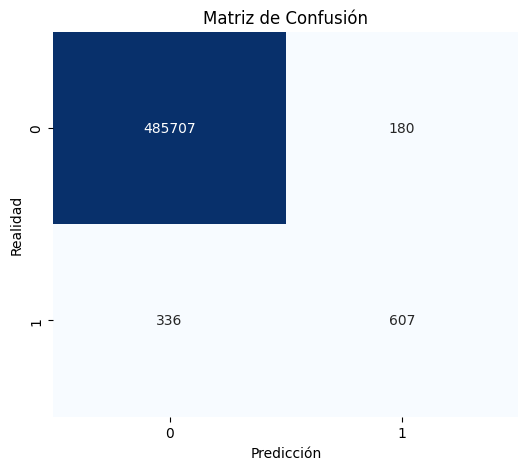

In [397]:
#Graficar la matriz de confusion

cm = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [405]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=3, 
                                  random_state=42,
                                  n_jobs=-1,
                                  criterion = 'log_loss',
                                  max_depth=5,
                                  max_features='log2',
                                  #class_weight='balanced'
                                  ) 
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
recall = recall_score(y_test, y_pred)
print(i)
print("Recall con Random Forest:", recall)
print("f1-Score con Random Forest:", f1_score(y_test, y_pred))

9
Recall con Random Forest: 0.6193001060445387
f1-Score con Random Forest: 0.6818447168709866


In [406]:
#Matriz de confusion

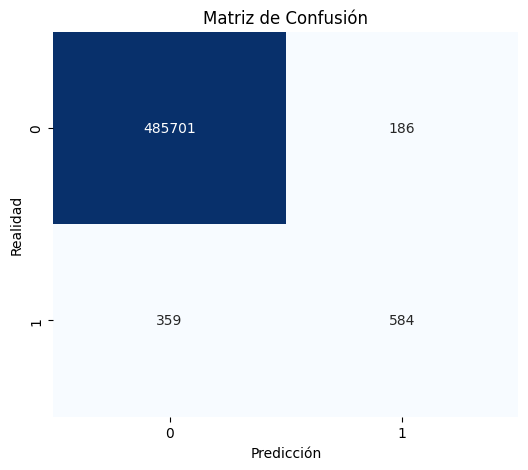

In [399]:
#Graficar la matriz de confusion

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [401]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    voting='soft'  # usa probabilidades para mayor sensibilidad
)
ensemble_model.fit(x_train, y_train)
y_pred_ens = ensemble_model.predict(x_test)
recall_ens = recall_score(y_test, y_pred_ens)
print("Recall con Ensemble:", recall_ens)
print(f'f1_socore con Ensemble:', f1_score(y_test, y_pred_ens))


c:\Users\el_me\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:25:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_features", "sample_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Recall con Ensemble: 0.6500530222693531
f1_socore con Ensemble: 0.704192992533027


In [403]:
from sklearn.ensemble import ExtraTreesClassifier
for i in range(1,10,1):
    et_model = ExtraTreesClassifier(n_estimators=i, 
                                    random_state=42,
                                    n_jobs=-1,
                                    criterion = 'log_loss',
                                    max_depth=5,
                                    max_features='log2',
                                    class_weight='balanced'
                                    )
    et_model.fit(x_train, y_train)
    y_pred_et = et_model.predict(x_test)
    recall_et = recall_score(y_test, y_pred_et)
    print(i)
    print("Recall con Extra Trees:", recall_et)
    print(f'f1-score: {f1_score(y_test, y_pred_et)}')

1
Recall con Extra Trees: 0.9798515376458112
f1-score: 0.010673628398320405
2
Recall con Extra Trees: 0.6839872746553552
f1-score: 0.6154580152671756
3
Recall con Extra Trees: 0.6914103923647932
f1-score: 0.5397350993377483
4
Recall con Extra Trees: 0.806998939554613
f1-score: 0.021560822201130456
5
Recall con Extra Trees: 0.8154825026511134
f1-score: 0.02069206759229362
6
Recall con Extra Trees: 0.8536585365853658
f1-score: 0.018884522901882587
7
Recall con Extra Trees: 0.855779427359491
f1-score: 0.018907489193210173
8
Recall con Extra Trees: 0.8780487804878049
f1-score: 0.016606331665346315
9
Recall con Extra Trees: 0.9840933191940615
f1-score: 0.010767784829954864


In [ ]:
et_model = ExtraTreesClassifier(n_estimators=8, 
                                    random_state=42,
                                    n_jobs=-1,
                                    criterion = 'log_loss',
                                    max_depth=5,
                                    max_features='log2',
                                    class_weight='balanced')
et_model.fit(x_train, y_train)
y_pred_et = et_model.predict(x_test)
recall_et = recall_score(y_test, y_pred_et)
print(i)
print("Recall con Extra Trees:", recall_et)
print("f1-Score con Extra Trees:", f1_score(y_test, y_pred_et))

9
Recall con Extra Trees: 0.8780487804878049


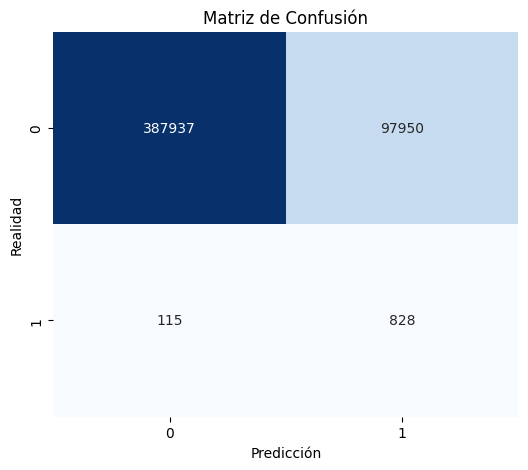

In [363]:
#Graficar la matriz de confusion

cm = confusion_matrix(y_test, y_pred_et)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [ ]:
import joblib
joblib.dump(modelo, 'modelo_laft.pkl')
print('Modelo guardado como modelo_laft.pkl')
